In [7]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Loading the data set
data_url = 'https://raw.githubusercontent.com/MMugambi/CIS678/main/training_set.csv'
ebird_train = pd.read_csv(data_url, index_col=0)
# ebird_test = pd.read_csv('test_set.csv')

In [3]:
ebird_train.shape

(85, 14832)

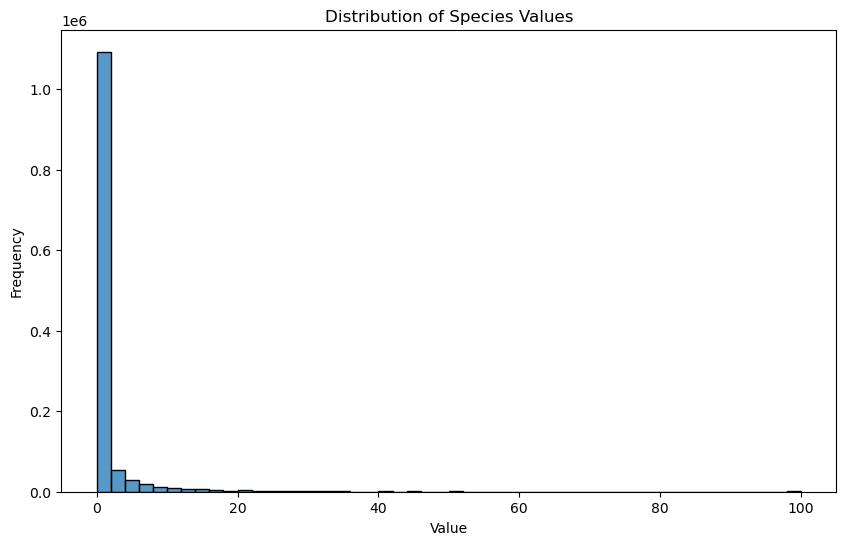

In [19]:
# We need to check the distribution of the data
structure = ebird_train.values.flatten()

# Plot histogram of all values
plt.figure(figsize=(10, 6))
sns.histplot(structure, bins=50)
plt.title('Distribution of Species Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# From the diagram we can see that oour data is skewed towards the right having many zero values which suggests that most species were not frequently observed.

In [17]:
ebird_train.head()

,train1,train2,train3,train4,train5,train6,train7,train8,train9,train10,...,train14823,train14824,train14825,train14826,train14827,train14828,train14829,train14830,train14831,train14832
Apapane,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Hawaii_Elepaio,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kalij_Pheasant,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Northern_Cardinal,1,0,1,4,4,0,2,2,0,0,...,1,2,1,3,0,0,0,0,1,0
Omao,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Checking for the skewness of data
# data_distribution = ebird_train.describe()


In [6]:
print(ebird_train.dtypes)

train1        int64
train2        int64
train3        int64
train4        int64
train5        int64
              ...  
train14828    int64
train14829    int64
train14830    int64
train14831    int64
train14832    int64
Length: 14832, dtype: object


In [7]:
# We need to transpose the data so that each row represents a single instance and column for features 
ebird_transpose = ebird_train.T
ebird_transpose.head()
# ebird_test_transpose = ebird_test.T

,Apapane,Hawaii_Elepaio,Kalij_Pheasant,Northern_Cardinal,Omao,Warbling_White_eye,Black_necked_Stilt,Cattle_Egret,Hawaii_Amakihi,House_Finch,...,Red_Avadavat,Least_Tern,Wild_Turkey,Black_Francolin,Eurasian_Wigeon,Greater_White_fronted_Goose,Mourning_Dove,Pectoral_Sandpiper,White_faced_Ibis,Red_masked_Parakeet
train1,0,0,0,1,0,0,28,10,0,4,...,0,3,0,0,0,0,0,0,3,0
train2,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
train3,0,0,0,1,0,2,35,1,0,1,...,0,0,0,0,0,0,0,0,0,0
train4,0,0,0,4,0,5,0,0,0,5,...,15,0,0,0,0,0,0,0,0,0
train5,0,0,0,4,0,17,0,5,0,6,...,18,0,0,2,0,0,0,0,0,0


In [21]:

# performing log transormation of the data to reduce skewness in the data
# obj_cols = ['Unnamed: 0']
# train_obj = ebird_train[obj_cols]
# non_numeric_cols = ebird_train.select_dtypes(exclude=[np.number]).columns # Identify non-numeric columns
# train_numeric = ebird_train.drop(columns=obj_cols) #drop non-numeric columns if you don't need them for log transformation
train_log = np.log(1 + ebird_train)
# train_combined = pd.concat([train_obj,train_log], axis=1)
train_log.head()


,train1,train2,train3,train4,train5,train6,train7,train8,train9,train10,...,train14823,train14824,train14825,train14826,train14827,train14828,train14829,train14830,train14831,train14832
Apapane,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
Hawaii_Elepaio,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
Kalij_Pheasant,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
Northern_Cardinal,0.693147,0.0,0.693147,1.609438,1.609438,0.0,1.098612,1.098612,0.0,0.0,...,0.693147,1.098612,0.693147,1.386294,0.0,0.0,0.0,0.0,0.693147,0.0
Omao,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0


In [9]:
# Checking the ground truth 
np.random.seed(2024)
test_set_simulated = train_log.copy()

# Ground truth dictionary to store the actual species that were set to zero
ground_truth = {}
for index, row in test_set_simulated.iterrows():
    # Get the species that were observed (non-zero values)
    observed_species = row[row > 0].index.tolist()
    # Check if there are at least 5 observed species to select from
    if len(observed_species) >= 5:
        # Randomly select 5 observed species to be hidden (set to zero)
        hidden_species = np.random.choice(observed_species, size=5, replace=False)
        # Set the selected species' values to zero in the test set
        test_set_simulated.loc[index, hidden_species] = 0
        # Store the hidden species as ground truth for later evaluation
        ground_truth[index] = hidden_species
test_set_simulated.head()



,train1,train2,train3,train4,train5,train6,train7,train8,train9,train10,...,train14823,train14824,train14825,train14826,train14827,train14828,train14829,train14830,train14831,train14832
Apapane,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
Hawaii_Elepaio,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
Kalij_Pheasant,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
Northern_Cardinal,0.693147,0.0,0.693147,1.609438,1.609438,0.0,1.098612,1.098612,0.0,0.0,...,0.693147,1.098612,0.693147,1.386294,0.0,0.0,0.0,0.0,0.693147,0.0
Omao,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0


In [10]:
# Import the test data to train the model
testdata_url = 'https://raw.githubusercontent.com/MMugambi/CIS678/main/test_set.csv'
ebird_test = pd.read_csv(testdata_url, index_col=0)
ebird_test.head()

,test1,test2,test3,test4,test6,test7,test8,test9,test10,test11,...,test6348,test6349,test6350,test6351,test6352,test6353,test6354,test6355,test6356,test6357
Apapane,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Hawaii_Elepaio,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kalij_Pheasant,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Northern_Cardinal,0,0,2,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
Omao,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
ebird_test.shape 

(85, 6009)

In [12]:
# Performing log transformation of the data to reduce skewness
test_log = np.log(1 + ebird_test)
test_log.head()


,test1,test2,test3,test4,test6,test7,test8,test9,test10,test11,...,test6348,test6349,test6350,test6351,test6352,test6353,test6354,test6355,test6356,test6357
Apapane,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
Hawaii_Elepaio,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
Kalij_Pheasant,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
Northern_Cardinal,0.0,0.0,1.098612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.693147,0.0,0.0,0.693147,0.0,0.0,0.0,0.0
Omao,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [13]:
# Distance metric selection
# We will use the Euclidean distance, Manhattan distance and cosine similarity

# Euclidean distance
def euclidean_distance(vector1, vector2):
    return np.sqrt(np.sum((vector1 - vector2) ** 2))

# Manhattan distance
def manhattan_distance(vector1, vector2):
    return np.sum(np.abs(vector1 -vector2))

# Cosine Similarity
def cosine_distance(vector1, vector2):
    dot_product = np.dot(vector1, vector2)
    norm1 = np.linalg.norm(vector1)
    norm2 = np.linalg.norm(vector2)
    cosine_similarity = dot_product/(norm1*norm2)
    cos_distance = 1 - cosine_similarity
    return cos_distance
def cosine_similarity(row1, row2):
    dot_product = np.dot(row1, row2)
    norm_a = np.linalg.norm(row1)
    norm_b = np.linalg.norm(row2)
    return dot_product / (norm_a * norm_b)
 


In [14]:
# Inspect the first few rows of the dataset
print(train_log.head())
print(test_log.head())

# Inspect the data types of the columns
print(train_log.dtypes)
print(test_log.dtypes)


                     train1  train2    train3    train4    train5  train6  \
Apapane            0.000000     0.0  0.000000  0.000000  0.000000     0.0   
Hawaii_Elepaio     0.000000     0.0  0.000000  0.000000  0.000000     0.0   
Kalij_Pheasant     0.000000     0.0  0.000000  0.000000  0.000000     0.0   
Northern_Cardinal  0.693147     0.0  0.693147  1.609438  1.609438     0.0   
Omao               0.000000     0.0  0.000000  0.000000  0.000000     0.0   

                     train7    train8  train9  train10  ...  train14823  \
Apapane            0.000000  0.000000     0.0      0.0  ...    0.000000   
Hawaii_Elepaio     0.000000  0.000000     0.0      0.0  ...    0.000000   
Kalij_Pheasant     0.000000  0.000000     0.0      0.0  ...    0.000000   
Northern_Cardinal  1.098612  1.098612     0.0      0.0  ...    0.693147   
Omao               0.000000  0.000000     0.0      0.0  ...    0.000000   

                   train14824  train14825  train14826  train14827  train14828  \
Apapa

In [15]:
# kNN prediction function without using sklearn
def knn_predict(test_instance, training_data, k, distance_metric='manhattan'):
    distances = []
    
    # Iterate over all the training data to calculate distances
    for index, train_instance in training_data.iterrows():
        if distance_metric == 'euclidean':
            dist = euclidean_distance(test_instance, train_instance)
        elif distance_metric == 'manhattan':
            dist = manhattan_distance(test_instance, train_instance)
        elif distance_metric == 'cosine':
            dist = 1 - cosine_similarity(test_instance, train_instance)  # Cosine similarity -> Cosine distance
        else:
            raise ValueError(f"Unknown distance metric: {distance_metric}")
        
        distances.append((index, dist))
    
    # Sort distances by the smallest distance
    distances.sort(key=lambda x: x[1])
    
    # Select the top k nearest neighbors
    nearest_neighbors = distances[:k]
    
    # Aggregate the species from the nearest neighbors
    # Get the indices of the species predicted to be the most frequent
    neighbor_species = training_data.iloc[[n[0] for n in nearest_neighbors]].sum(axis=0)
    
    # Get the top 5 species with the highest aggregated values
    predicted_species = neighbor_species.nlargest(5).index.tolist()
    
    return predicted_species

# Function to apply kNN for all test data and predict the unreported species
def knn_predict_all(test_data, training_data, k=5, distance_metric='manhattan'):
    predictions = {}
    
    for idx, test_instance in test_data.iterrows():
        # Predict the 5 most likely unreported species for each test instance
        predicted_species = knn_predict(test_instance, training_data, k, distance_metric)
        predictions[idx] = predicted_species
    
    return predictions

# Load the log-transformed data
# Assuming the log-transformed data for training and test sets is already loaded
# test_log = np.log(1 + ebird_test)
# ebird_train_log = np.log(1 + ebird_train)

# Set number of neighbors and distance metric
k = 5
distance_metric = 'manhattan'  # You can switch to 'manhattan' or 'cosine' if needed

# Step 1: Reset the index to move species names from index to a column
ebird_train_log = train_log.reset_index()
test_log = test_log.reset_index()

# Step 2: Drop the non-numeric 'index' column containing species names
training_data_numeric = ebird_train_log.drop(columns=['index'])
test_data_numeric = test_log.drop(columns=['index'])

# Step 3: Ensure that only numeric columns are processed
training_data_numeric = training_data_numeric.apply(pd.to_numeric, errors='coerce')
test_data_numeric = test_data_numeric.apply(pd.to_numeric, errors='coerce')

# Step 4: Predict species for all test instances using kNN
predictions = knn_predict_all(test_data_numeric, training_data_numeric, k=k, distance_metric=distance_metric)

# Display predictions
# for test_idx, predicted_species in predictions.items():
    # print(f"Test checklist {test_idx}: Predicted species - {predicted_species}")


In [16]:

# MAE Calculation
def calculate_mae(predictions, ground_truth, total_species):
    total_error = 0
    num_checklists = len(ground_truth)  # Total number of checklists (test instances)
    
    for checklist_idx, actual_species in ground_truth.items():
        predicted_species = predictions.get(checklist_idx, [])
        
        # Find false positives (species predicted but not in the ground truth)
        false_positives = len([species for species in predicted_species if species not in actual_species])
        
        # Find false negatives (species in the ground truth but not predicted)
        false_negatives = len([species for species in actual_species if species not in predicted_species])
        
        # Total errors (false positives + false negatives) for this checklist
        error_for_checklist = false_positives + false_negatives
        
        # Normalize error by dividing by the total number of species
        normalized_error = error_for_checklist / total_species
        
        # Accumulate the error
        total_error += normalized_error
    
    # Compute the Mean Absolute Error (MAE)
    mae = total_error / num_checklists
    return mae

# Assuming the log-transformed data is loaded
# Set number of neighbors and distance metric
k = 5
distance_metric = 'manhattan'  # You can switch to 'manhattan' or 'cosine' if needed

# Step 1: Reset the index to move species names from index to a column
ebird_train_log = ebird_train_log.reset_index()
test_log = test_log.reset_index()

# Step 2: Drop the non-numeric 'index' column containing species names
training_data_numeric = ebird_train_log.drop(columns=['index'])
test_data_numeric = test_log.drop(columns=['index'])

# Step 3: Ensure that only numeric columns are processed
training_data_numeric = training_data_numeric.apply(pd.to_numeric, errors='coerce')
test_data_numeric = test_data_numeric.apply(pd.to_numeric, errors='coerce')

# Step 4: Predict species for all test instances using kNN
predictions = knn_predict_all(test_data_numeric, training_data_numeric, k=k, distance_metric=distance_metric)

# Total number of species (this will be used to normalize the MAE)
total_species = 85  # Assuming there are 85 species in the dataset

# Step 5: Calculate MAE by comparing predictions and ground truth
mae = calculate_mae(predictions, ground_truth, total_species)
print(f"Mean Absolute Error (MAE): {mae}")


Mean Absolute Error (MAE): 0.05882352941176458
